In [269]:
import pandas as pd

data = pd.read_csv('breast-cancer-wisconsin.data')

In [270]:
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [271]:
column_names = [
    'sample_code_number',
    'clump_thickness',
    'uniformity_of_cell_size',
    'uniformity_of_cell_shape',
    'marginal_adhesion',
    'single_epithelial_cell_size',
    'bare_nuclei',
    'bland_chromatin',
    'normal_nucleoli',
    'mitoses',
    'class'
]

data = pd.read_csv('breast-cancer-wisconsin.data', names=column_names)
data.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [272]:
data.dtypes

sample_code_number              int64
clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

In [273]:
# A helper function to find numeric values
def check_numeric(x):
    return x.isnumeric()

# A helper function to find non-numeric values
def check_not_numeric(x):
    return not x.isnumeric()

In [274]:
mask = data['bare_nuclei'].apply(check_not_numeric)
mask

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696    False
697    False
698    False
Name: bare_nuclei, Length: 699, dtype: bool

In [275]:
data[mask]

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [276]:
len(data[mask])

16

In [277]:
data_numeric = data[~mask]

In [279]:
data_numeric['bare_nuclei'] = data_numeric['bare_nuclei'].astype('int64')

<ipython-input-279-902140f80d8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['bare_nuclei'] = data_numeric['bare_nuclei'].astype('int64')


In [280]:
data_numeric.dtypes

sample_code_number             int64
clump_thickness                int64
uniformity_of_cell_size        int64
uniformity_of_cell_shape       int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [281]:
data_input = data_numeric.drop(columns=['sample_code_number', 'class'])
data_output = data_numeric['class']

In [282]:
data_input.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [283]:
data_output.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [284]:
# print unique values (we can see the values are 2 and 4)
data_output.unique()

array([2, 4], dtype=int64)

In [285]:
# replace 2 with 0, and 4 with 1
data_output = data_output.replace({2: 0, 4: 1})

In [286]:
# print unique values (the values now become 0 and 1)
data_output.unique()

array([0, 1], dtype=int64)

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
# splitting 33% for testing
X, X_test, y, y_test = train_test_split(
    data_input, data_output, test_size=0.33, random_state=2)

# splitting the remaining part (X, y) to training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.33, random_state=2)

In [289]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('------------')
print('X_val:', X_val.shape)
print('y_val:', y_val.shape)
print('------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (306, 9)
y_train: (306,)
------------
X_val: (151, 9)
y_val: (151,)
------------
X_test: (226, 9)
y_test: (226,)


In [290]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
model = DecisionTreeClassifier(max_depth=3, random_state=2)

In [292]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [293]:
from sklearn.metrics import accuracy_score

In [294]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [295]:
print('Training accuracy =', accuracy_score(y_train, y_pred_train))
print('Validation accuracy =', accuracy_score(y_val, y_pred_val))

Training accuracy = 0.9803921568627451
Validation accuracy = 0.9668874172185431


In [296]:
# we are going to try these values
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8]

# we store the accuracy values of our experiments in two lists 
# (for training and validation)
training_accuracy_values = []
validation_accuracy_values = []

# we loop over the max_depth_values
for max_depth_val in max_depth_values:
    
    # create the model
    model = DecisionTreeClassifier(max_depth=max_depth_val, 
                                   random_state=2)
    
    # train the model
    model.fit(X_train, y_train)
    
    # calculate the training and validation accuracy
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    # add these results to the lists
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)

Now we can make a plot to visualize the results

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline

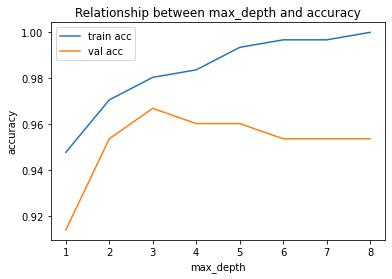

In [298]:
plt.plot(max_depth_values, training_accuracy_values, label="train acc")
plt.plot(max_depth_values, validation_accuracy_values, label="val acc")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth and accuracy')
plt.legend()
plt.show()

In [299]:
model_best = DecisionTreeClassifier(max_depth=3, random_state=2)
model_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [300]:
y_pred_test = model_best.predict(X_test)

In [301]:
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

Test accuracy: 0.9292035398230089


In [302]:
import pickle

with open('saved-model.pickle', 'wb') as f:
    pickle.dump(model_best, f)

To load a saved model we use `pickle.load()` function.

In [303]:
with open('saved-model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)

In [304]:
loaded_model

DecisionTreeClassifier(max_depth=3, random_state=2)

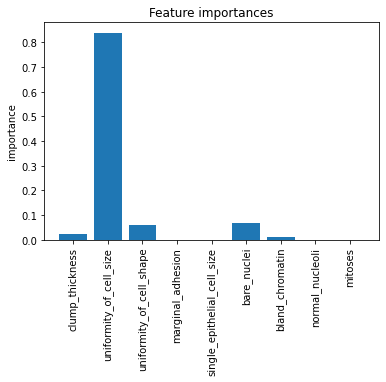

In [306]:
plt.bar(feature_names, model_best.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.title('Feature importances')
plt.show()